In [6]:
import json

hands = []
with open('/Volumes/Seagate Backup Plus Drive/Project/hands_valid.json', 'r') as f:
    line = f.readline()
    while line:
        hands.append(json.loads(line))
        line = f.readline()

In [7]:
players = {}
for hand in hands:
    for i in range(hand['num_players']):
        players[hand['players'][i]['user']] = players.get(hand['players'][i]['user'], 0) + 1

In [ ]:
import numpy as np

for i in [25, 50, 75, 99]:
    print(str(i) + 'th Percentile: ' + str(np.percentile(np.asarray(list(players.values())), i)))
print('Maximum: ' + str(max(players.values())))

In [ ]:
# Adapted from clean.py in the PokerHandsDataset Repo

top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:100])

fout = open('/Volumes/Seagate Backup Plus Drive/Project/hands_top.json', 'w')
with open('/Volumes/Seagate Backup Plus Drive/Project/hands.json', 'r') as f:
    line = f.readline()
    while line:
        hand = json.loads(line)
        for i in range(hand['num_players']):
            if hand['players'][i]['user'] in top_players:
                fout.write(json.dumps(hand) + '\n')
        line = f.readline()
fout.close()

In [ ]:
# Adapted from clean.py in the PokerHandsDataset Repo

top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:10])

fout = open('/Volumes/Seagate Backup Plus Drive/Project/hands_top_10.json', 'w')
with open('/Volumes/Seagate Backup Plus Drive/Project/hands.json', 'r') as f:
    line = f.readline()
    while line:
        hand = json.loads(line)
        for i in range(hand['num_players']):
            if hand['players'][i]['user'] in top_players:
                fout.write(json.dumps(hand) + '\n')
        line = f.readline()
fout.close()

In [1]:
import json

top_hands = []
with open('/Volumes/Seagate Backup Plus Drive/Project/hands_top_10.json', 'r') as f:
    line = f.readline()
    while line:
        top_hands.append(json.loads(line))
        line = f.readline()

In [ ]:
top_100_hands = []
with open('/Volumes/Seagate Backup Plus Drive/Project/hands_top.json', 'r') as f:
    line = f.readline()
    while line:
        top_100_hands.append(json.loads(line))
        line = f.readline()

In [ ]:
len(top_hands)

# Preflop Betting

In [ ]:
top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:10])

s_pairs = [('A','A'), ('K','K'), ('Q','Q'), ('J','J'), ('T','T'), ('9','9'), ('8', '8'), \
    ('7','7')]
s_suit = [('A','K'), ('A','Q'), ('A','J'), ('A','T'), ('K','Q'), ('K','J'), \
    ('K','T'), ('Q','J'), ('Q','T'), ('J','T'), ('J', '9'), ('T', '9')]
s_off = [('A','K'), ('A','Q'), ('A','J'), ('A','T'), ('K','Q'), ('K','J')]
a_pairs = [('6','6'), ('5','5')]
a_suit = [('A','9'), ('A','8'), ('A','7'), ('A','6'), ('K','9'), ('Q','9'), \
         ('Q','8'), ('J','8'), ('T','8'), ('9','8')]
a_off = [('K','T'), ('Q','J'), ('Q','T'), ('J','T')]
b_pairs = [('4','4'), ('3','3'), ('2','2')]
b_suit = [('A','5'), ('A','4'), ('A','3'), ('A','2'), ('K','8'), ('K','7'), \
         ('K','6'), ('K','5'), ('K','4'), ('K','3'), ('K','2'), ('J','7'), \
         ('T','7'), ('T','6'), ('9','7'), ('9','6'), ('8','7'), ('8','6'), \
         ('7','6'), ('7','5'), ('6','5'), ('5','4')]
b_off = [('A','9'), ('A','8'), ('A','7'), ('K','9'), ('Q','9'), ('J','9'), \
        ('J','8'), ('T','9'), ('T','8'), ('9','8'), ('9','7'), ('8','7')]

cards = [s_pairs, s_off, a_pairs, a_off, b_pairs, b_off]
norm_lookup = {}
for i in range(len(cards)):
    for c in cards[i]:
        norm_lookup[c] = i // 2
        norm_lookup[(c[1],c[0])] = i // 2
suited = [s_suit, a_suit, b_suit]
suit_lookup = {}
for i in range(len(suited)):
    for c in suited[i]:
        suit_lookup[c] = i // 2
        suit_lookup[(c[1],c[0])] = i // 2
        
def card_value(pocket):
    if pocket[0][1] == pocket[1][1]:
        return suit_lookup.get((pocket[0][0], pocket[1][0]), 3)
    return norm_lookup.get((pocket[0][0], pocket[1][0]), 3)

In [ ]:
player_raise = {x: [0,0,0,0] for x in top_players}
player_total = {x: [0,0,0,0] for x in top_players}
for hand in hands:
    for i in range(hand['num_players']):
        if hand['players'][i]['user'] in top_players:
            player = hand['players'][i]['user']
            ind = card_value(hand['players'][i]['pocket_cards'])
            if 'r' in hand['players'][i]['bets'][0]['actions']:
                temp = player_raise[player]
                temp[ind] = temp[ind] + 1
                player_raise[player] = temp
            temp = player_total[player]
            temp[ind] = temp[ind] + 1
            player_total[player] = temp
            
player_perc_raise = {}
for player in top_players:
    temp = []
    for i in range(4):
        temp.append(player_raise[player][i] / player_total[player][i])
    player_perc_raise[player] = temp

In [ ]:
for i in range(4):
    plt.figure()
    for player in top_players:
        plt.barh(player + ' (n = ' + str(player_total[player][i]) + ')', player_perc_raise[player][i])
        plt.xlabel('Probability of Raising with Tier ' + str(i+1) + ' Cards Preflop')
        plt.title('Different players have drastically different pre flop raise probabilities')

In [ ]:
import pandas as pd

pre_raise = pd.DataFrame(columns = ['didRaise', 'hand_strength', 'position', 'stack_size', 'player'])
top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:100])

for hand in hands:
    for i in range(hand['num_players']):
        if hand['players'][i]['user'] in top_players:
            didRaise = int('r' in hand['players'][i]['bets'][0]['actions'])
            hand_strength = card_value(hand['players'][i]['pocket_cards'])
            position = hand['players'][i]['pos']
            stack_size = hand['players'][i]['bankroll']
            player = hand['players'][i]['user']
            pre_raise.loc[len(pre_raise)] = [didRaise, hand_strength, position, stack_size, player]

In [ ]:
pre_raise = pd.get_dummies(pre_raise, columns = ['player'])

In [ ]:
pre_raise.to_csv('pre_raise.csv')

In [67]:
import pandas as pd

pre_raise = pd.read_csv('pre_raise.csv')
pre_raise = pre_raise.drop(pre_raise.columns[0], axis=1)
pre_raise = pre_raise.drop('player_Benja', axis=1) # baseline
pre_raise = pd.get_dummies(pre_raise, columns = ['hand_strength'])
pre_raise = pre_raise.drop('hand_strength_0', axis=1) # baseline
pre_raise['Intercept'] = 1
pre_raise.head()

,didRaise,position,stack_size,player_Benway,player_BlackBart,player_Blaze,player_CFigor,player_ChrisLinn,player_CrazyJim,player_CybrTigr,...,player_superman,player_tctim,player_theking,player_tilted,player_tvp,player_zxc,hand_strength_1,hand_strength_2,hand_strength_3,Intercept
0,0,1,3075,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,4,1025,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,1230,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
3,0,2,3132,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,2,3227,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [84]:
top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:100])
raise_prob = []
pre_raise = pd.read_csv('pre_raise.csv')
pre_raise = pre_raise.drop(pre_raise.columns[0], axis=1)
for player in top_players:
    raise_prob.append(len(pre_raise[pre_raise['player_' + player] == 1].query('didRaise == 1')) / len(pre_raise[pre_raise['player_' + player] == 1]))

Text(0.5, 1.0, 'Large Range in Pre-Flop Raise Decision Percentages')

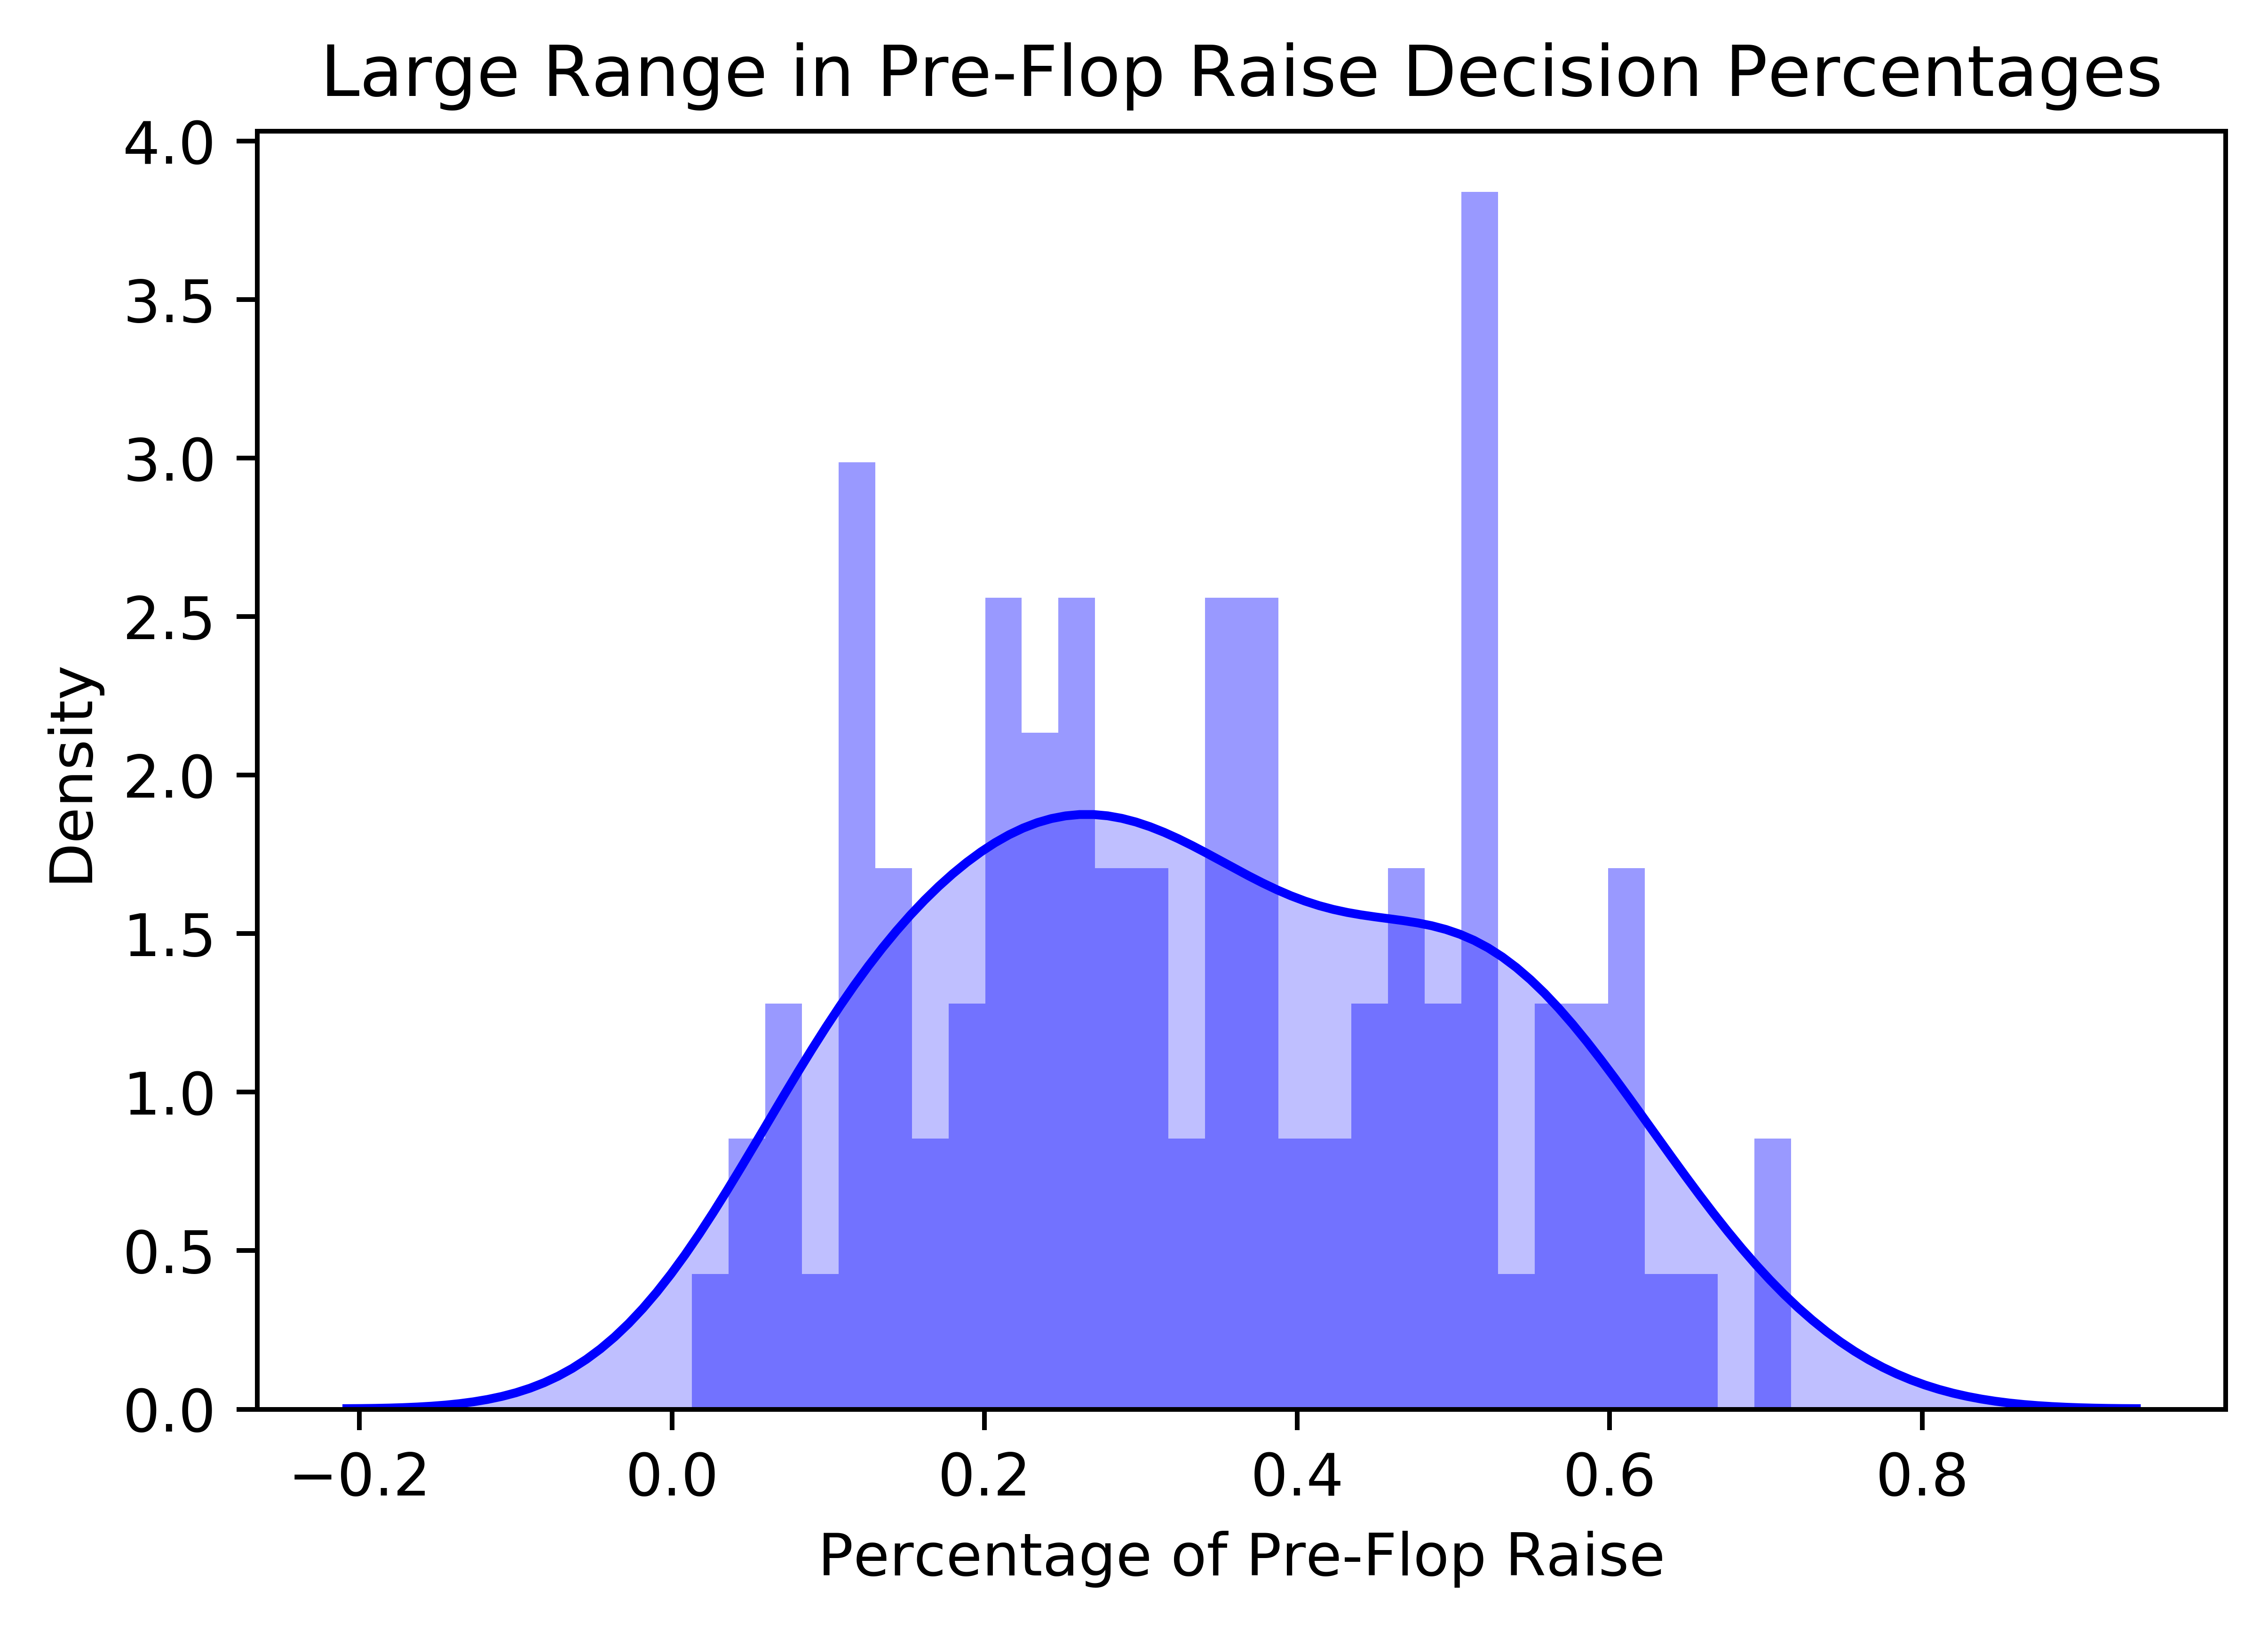

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(dpi = 900)
sns.distplot(raise_prob, kde=True, hist = True, kde_kws = {'shade': True}, color = 'blue', bins = 30)
plt.xlabel('Percentage of Pre-Flop Raise')
plt.ylabel('Density')
plt.title('Large Range in Pre-Flop Raise Decision Percentages')

In [57]:
import statsmodels.discrete.discrete_model as sm

# With player
logit = sm.Logit(pre_raise['didRaise'].values, pre_raise.loc[:, pre_raise.columns != 'didRaise'].values).fit()
full_llf = logit.llf
logit.summary(xname = list(pre_raise.loc[:, pre_raise.columns != 'didRaise'].columns.values))

Optimization terminated successfully.
         Current function value: 0.495129
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               209882
Model:                          Logit   Df Residuals:                   209777
Method:                           MLE   Df Model:                          104
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                  0.2319
Time:                        11:25:23   Log-Likelihood:            -1.0392e+05
converged:                       True   LL-Null:                   -1.3529e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
position            -0.9018      0.010    -89.790      0.000      -0.921      -0.882
stack_size        6.863e-08   2.67e-08      2.571      0.010    1.63e-08    1.21e-07
player_Benway        0.5451      0.058      9.443      0.000       0.432       0.658
player_BlackBart    -1.4235      0.055    -25.781      0.000      -1.532      -1.315
player_Blaze        -1.3368      0.068    -19.567      0.000      -1.471      -1.203
player_CFigor       -3.0474      0.095    -32.107      0.000      -3.233      -2.861
player_ChrisLinn    -0.1394      0.078     -1.784      0.074      -0.293       0.014
player_CrazyJim     -1.7970      0.094    -19.019      0.000      -1.982      -1.612
player_CybrTigr     -0.4924      0.059     -8.293      0.000      -0.609      -0.376
player_DM            0.2725      0.067      4.053      0.000       0.141       0.404
player_DP           -0.9003      0.065    -13.902      0.000      -1.027      -0.773
player_DopeyTwat    -1.6388      0.091    -18.064      0.000      -1.817      -1.461
player_DrOakland     0.4042      0.056      7.240      0.000       0.295       0.514
player_Eldon        -0.3546      0.073     -4.834      0.000      -0.498      -0.211
player_EmtaE        -0.8822      0.076    -11.574      0.000      -1.032      -0.733
player_FX           -0.6533      0.064    -10.154      0.000      -0.779      -0.527
player_Flash_man    -0.4918      0.073     -6.702      0.000      -0.636      -0.348
player_Funky        -2.7799      0.102    -27.230      0.000      -2.980      -2.580
player_GAR2         -1.0330      0.076    -13.615      0.000      -1.182      -0.884
player_Gabe         -0.3756      0.061     -6.151      0.000      -0.495      -0.256
player_Gremlin      -0.0651      0.072     -0.899      0.369      -0.207       0.077
player_Grizz         0.6954      0.070      9.941      0.000       0.558       0.833
player_Gunshot       0.7421      0.081      9.199      0.000       0.584       0.900
player_Harry^T      -0.9439      0.071    -13.336      0.000      -1.083      -0.805
player_Houtex       -1.4371      0.094    -15.317      0.000      -1.621      -1.253
player_JADC         -2.1116      0.100    -21.066      0.000      -2.308      -1.915
player_JKhearts     -2.0584      0.103    -20.064      0.000      -2.259      -1.857
player_K6           -0.5687      0.071     -7.970      0.000      -0.709      -0.429
player_Kevin_Un     -1.0097      0.079    -12.856      0.000      -1.164      -0.856
player_KisMyAce      0.0981      0.067      1.458      0.145      -0.034       0.230
player_Massa        -1.6445      0.086    -19.085      0.000      -1.813      -1.476
player_MegaHertz    -1.2221      0.058    -21.184      0.000      -1.335      -1.109
player_Muck         -0.8192      0.064    -12.828      0.000      -0.944      -0.694
player_Muck_It      -0.3974      0.077     -5.157      0.000      -0.548      -0.246
player_Nermal        0.5714      0.066      8.653      0.000       0.442       0.701
player_Pato

In [58]:
logit.conf_int()

array([[-9.21439316e-01, -8.82071691e-01],
       [ 1.63157216e-08,  1.20934806e-07],
       [ 4.31985843e-01,  6.58270202e-01],
       [-1.53175413e+00, -1.31531108e+00],
       [-1.47070691e+00, -1.20289565e+00],
       [-3.23339700e+00, -2.86134807e+00],
       [-2.92571518e-01,  1.37816516e-02],
       [-1.98215840e+00, -1.61178538e+00],
       [-6.08796323e-01, -3.76029731e-01],
       [ 1.40724571e-01,  4.04222217e-01],
       [-1.02724785e+00, -7.73394465e-01],
       [-1.81660052e+00, -1.46097411e+00],
       [ 2.94752406e-01,  5.13576976e-01],
       [-4.98402601e-01, -2.10857119e-01],
       [-1.03161078e+00, -7.32811554e-01],
       [-7.79446983e-01, -5.27232354e-01],
       [-6.35683989e-01, -3.48009101e-01],
       [-2.98001540e+00, -2.57983077e+00],
       [-1.18174386e+00, -8.84321308e-01],
       [-4.95222909e-01, -2.55885118e-01],
       [-2.06998860e-01,  7.68412777e-02],
       [ 5.58311457e-01,  8.32540980e-01],
       [ 5.84021173e-01,  9.00246271e-01],
       [-1.

Text(0.5, 1.0, 'One Outlier Present')

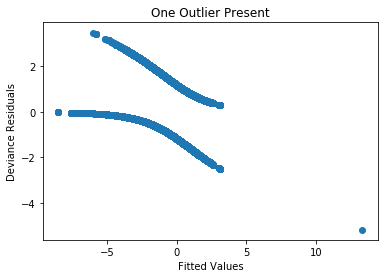

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(logit.fittedvalues, logit.resid_dev)
plt.xlabel('Fitted Values')
plt.ylabel('Deviance Residuals')
plt.title('One Outlier Present')

In [60]:
import numpy as np
# model without intercept
logit = sm.Logit(pre_raise['didRaise'].values, pre_raise.drop(['didRaise', 'Intercept'], axis=1).values).fit()

vif_data = pd.DataFrame()
vif_data["feature"] = pre_raise.drop(['didRaise', 'Intercept'], axis=1).columns
# https://stats.stackexchange.com/questions/474964/calculating-variance-inflation-factor-for-logistic-regression-using-statsmodels
cov = logit.cov_params()
corr = cov / logit.bse / logit.bse[:, None]
vif_data["VIF"] = np.diag(np.linalg.inv(corr))

Optimization terminated successfully.
         Current function value: 0.501579
         Iterations 8


In [61]:
vif_data.sort_values('VIF', axis = 0, ascending = False)

,feature,VIF
0,position,8.232828
103,hand_strength_3,2.491135
101,hand_strength_1,1.662418
102,hand_strength_2,1.651179
88,player_sagerbot,1.640266
...,...,...
90,player_screampee,1.025269
89,player_sass,1.022869
75,player_lilly,1.021652
52,player_alfalfa,1.011026


In [89]:
vif_data

,feature,VIF
0,position,8.232828
1,stack_size,1.321226
2,player_Benway,1.234726
3,player_BlackBart,1.246450
4,player_Blaze,1.095770
...,...,...
99,player_tvp,1.137344
100,player_zxc,1.074844
101,hand_strength_1,1.662418
102,hand_strength_2,1.651179


In [64]:
# Without player
logit = sm.Logit(pre_raise['didRaise'].values, pre_raise[['hand_strength_1', 'hand_strength_2', 'hand_strength_3', 'position', 'stack_size', 'Intercept']].values).fit()
partial_llf = logit.llf
logit.summary(xname = ['hand_strength_1', 'hand_strength_2', 'hand_strength_3', 'position', 'stack_size', 'Intercept'])

Optimization terminated successfully.
         Current function value: 0.569503
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               209882
Model:                          Logit   Df Residuals:                   209876
Method:                           MLE   Df Model:                            5
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                  0.1165
Time:                        11:26:34   Log-Likelihood:            -1.1953e+05
converged:                       True   LL-Null:                   -1.3529e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
hand_strength_1    -0.9739      0.015    -65.085      0.000      -1.003      -0.945
hand_strength_2    -1.2251      0.015    -80.410      0.000      -1.255      -1.195
hand_strength_3    -1.8121      0.012   -145.002      0.000      -1.837      -1.788
position           -0.7603      0.009    -84.871      0.000      -0.778      -0.743
stack_size       3.835e-08   1.99e-08      1.929      0.054   -6.16e-10    7.73e-08
Intercept           1.6107      0.017     95.250      0.000       1.578       1.644
===================================================================================
"""

In [65]:
logit.conf_int()

array([[-1.00322016e+00, -9.44564958e-01],
       [-1.25494207e+00, -1.19522010e+00],
       [-1.83657420e+00, -1.78758702e+00],
       [-7.77842096e-01, -7.42726926e-01],
       [-6.16047569e-10,  7.73235715e-08],
       [ 1.57759714e+00,  1.64388603e+00]])

In [66]:
# https://stackoverflow.com/questions/38248595/likelihood-ratio-test-in-python/38249020
from scipy.stats.distributions import chi2
def likelihood_ratio(llmin, llmax):
    return(2*(llmax-llmin))
LR = likelihood_ratio(partial_llf,full_llf)
chi2.sf(LR, 99) # L2 has 99 DoF more than L1

0.0

# Showdown cards

In [32]:
col = pre_raise.columns
def numGames(row):
    players_involved = [x for x in col if x not in ['didRaise', 'hand_strength', 'position', 'stack_size', 'Intercept']]
    return players[row[players_involved].idxmax(axis=1)[7:]]

pre_raise['games_played'] = pre_raise.apply(lambda row: numGames(row), axis=1)

In [54]:
players_involved = [x for x in col if x not in ['didRaise', 'hand_strength', 'position', 'stack_size', 'Intercept']]

games_played = []
prop_tier_4 = []
for player in players_involved:
    games_played.append(players[player[7:]])
    prop_tier_4.append(len(pre_raise[pre_raise[player] == 1].query('hand_strength == 3')) / len(pre_raise[pre_raise[player] == 1]))

Text(0.5, 1.0, 'Slight Negative Trend Between Games Played and Proportion of Tier 4 Cards')

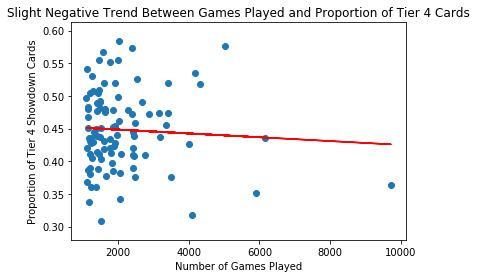

In [55]:
import numpy as np
plt.scatter(games_played, prop_tier_4)
z = np.polyfit(games_played, prop_tier_4, 1)
p = np.poly1d(z)
plt.plot(games_played,p(games_played),"r")
plt.ylabel('Proportion of Tier 4 Showdown Cards')
plt.xlabel('Number of Games Played')
plt.title('Slight Negative Trend Between Games Played and Proportion of Tier 4 Cards')

In [114]:
pre_raise['games_played'].head()

0    9721
1    1217
2    1916
3    9721
4    9721
Name: games_played, dtype: int64

In [124]:
import statsmodels.discrete.discrete_model as sm

logit = sm.MNLogit(pre_raise['hand_strength'].values, pre_raise[['position', 'stack_size', 'Intercept']].values).fit()
partial_llf = logit.llf
logit.summary()

Optimization terminated successfully.
         Current function value: 1.282179
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:               209882
Model:                        MNLogit   Df Residuals:                   209873
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                0.001834
Time:                        23:32:48   Log-Likelihood:            -2.6911e+05
converged:                       True   LL-Null:                   -2.6960e+05
Covariance Type:            nonrobust   LLR p-value:                2.084e-210
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0412      0.012      3.391      0.001       0.017       0.065
x2          9.217e-08   3.76e-08      2.453      0.014    1.85e-08    1.66e-07
const         -0.4970      0.020    -24.665      0.000      -0.537      -0.458
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0195      0.012      1.608      0.108      -0.004       0.043
x2          1.189e-07   3.58e-08      3.321      0.001    4.87e-08    1.89e-07
const         -0.4549      0.020    -22.662      0.000      -0.494      -0.416
------------------------------------------------------------------------------
       y=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2450      0.009     26.105      0.000       0.227       0.263
x2          7.443e-08   3.32e-08      2.244      0.025    9.41e-09    1.39e-07
const          0.2282      0.016     14.451      0.000       0.197       0.259
==============================================================================
"""

In [121]:
logit.conf_int()

array([[[ 1.73893589e-02,  6.50273807e-02],
        [ 1.85339499e-08,  1.65796642e-07],
        [-5.36538540e-01, -4.57544476e-01]],

       [[-4.27102032e-03,  4.33461722e-02],
        [ 4.87230257e-08,  1.89091384e-07],
        [-4.94286962e-01, -4.15593523e-01]],

       [[ 2.26625088e-01,  2.63417857e-01],
        [ 9.41189074e-09,  1.39453256e-07],
        [ 1.97221194e-01,  2.59113840e-01]]])

In [125]:
import statsmodels.discrete.discrete_model as sm

logit = sm.MNLogit(pre_raise['hand_strength'].values, pre_raise[['position', 'stack_size', 'games_played', 'Intercept']].values).fit()
full_llf = logit.llf
logit.summary()

Optimization terminated successfully.
         Current function value: 1.281644
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:               209882
Model:                        MNLogit   Df Residuals:                   209870
Method:                           MLE   Df Model:                            9
Date:                Fri, 09 Apr 2021   Pseudo R-squ.:                0.002251
Time:                        23:33:05   Log-Likelihood:            -2.6899e+05
converged:                       True   LL-Null:                   -2.6960e+05
Covariance Type:            nonrobust   LLR p-value:                1.299e-255
==============================================================================
       y=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0417      0.012      3.430      0.001       0.018       0.066
x2          1.274e-07   3.97e-08      3.205      0.001    4.95e-08    2.05e-07
x3         -1.414e-05    3.5e-06     -4.042      0.000    -2.1e-05   -7.29e-06
const         -0.4591      0.022    -20.518      0.000      -0.503      -0.415
------------------------------------------------------------------------------
       y=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0202      0.012      1.662      0.096      -0.004       0.044
x2          1.614e-07   3.68e-08      4.385      0.000    8.93e-08    2.34e-07
x3         -1.929e-05   3.51e-06     -5.502      0.000   -2.62e-05   -1.24e-05
const         -0.4029      0.022    -18.067      0.000      -0.447      -0.359
------------------------------------------------------------------------------
       y=3       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2462      0.009     26.202      0.000       0.228       0.265
x2          1.294e-07   3.41e-08      3.791      0.000    6.25e-08    1.96e-07
x3          -4.03e-05   2.77e-06    -14.541      0.000   -4.57e-05   -3.49e-05
const          0.3379      0.018     19.291      0.000       0.304       0.372
==============================================================================
"""

In [123]:
logit.conf_int()

array([[[ 1.78742442e-02,  6.55491607e-02],
        [ 4.94978950e-08,  2.05314384e-07],
        [-2.10023978e-05, -7.28587772e-06],
        [-5.02906368e-01, -4.15204098e-01]],

       [[-3.61624196e-03,  4.40328562e-02],
        [ 8.92837796e-08,  2.33602525e-07],
        [-2.61656930e-05, -1.24201966e-05],
        [-4.46627461e-01, -3.59207442e-01]],

       [[ 2.27795450e-01,  2.64629943e-01],
        [ 6.25214128e-08,  1.96344444e-07],
        [-4.57353439e-05, -3.48706130e-05],
        [ 3.03596299e-01,  3.72264736e-01]]])

In [128]:
LR = likelihood_ratio(partial_llf,full_llf)
chi2.sf(LR, 3) # L2 has 99 DoF more than L1

1.9311803140698052e-48

In [141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = ['Position', 'Stack Size', 'Games Played']
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(pre_raise[['position', 'stack_size', 'games_played']].values, i)
                          for i in [0,1,2]]
print(vif_data)

        feature       VIF
0      Position  2.453217
1    Stack Size  1.017023
2  Games Played  2.453173


# Range of Open Hands

In [ ]:
top = [0,0,0,0]
other = [0,0,0,0]

for hand in hands:
    for i in range(hand['num_players']):
        if hand['players'][i]['user'] in top_players:
            temp = card_value(hand['players'][i]['pocket_cards'])
            top[temp] = top[temp] + 1
        else:
            temp = card_value(hand['players'][i]['pocket_cards'])
            other[temp] = other[temp] + 1

In [ ]:
top_tot = sum(top)
oth_tot = sum(other)
top = [x / top_tot for x in top]
other = [x / oth_tot for x in other]

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

labels = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']
t1 = [top[0], other[0]]
t2 = [top[1], other[1]]
t3 = [top[2], other[2]]
t4 = [top[3], other[3]]
last = [0,0]
for i in range(len([t1, t2, t3, t4])):
    v = [t1,t2,t3,t4][i]
    plt.barh(['Top (n = ' + str(top_tot) + ')', 'Other (n = ' + str(oth_tot) + ')'], width = v, left = last, label=labels[i])
    last[0] = last[0] + v[0]
    last[1] = last[1] + v[1]
plt.xlabel('Percent of showdowns with different tier cards')
plt.title('Non-top players are more likely to enter the showdown with worse cards')
plt.legend()

# Play Style Change

In [ ]:
post_win_dur = []
post_win_eve = []
post_loss_dur = []
post_loss_eve = []

for i in range(len(top_hands)):
    try:
        hand = top_hands[i]
        for j in range(hand['num_players']):
            if hand['players'][j]['user'] in top_players:
                player = hand['players'][j]['user']
                if i != 0:
                    last_hand = top_hands[i-1]
                    if last_hand['hand_num'] == hand['hand_num'] - 1:
                        prev_win = False
                        for k in range(last_hand['num_players']):
                            if last_hand['players'][k]['user'] == player:
                                prev_win = last_hand['players'][k]['winnings'] != 0
                        dur = -1
                        eve = 1
                        for l in range(4):
                                if hand['players'][j]['bets'][l]['actions'] == ['f']:
                                    dur = l
                        if hand['players'][j]['bets'][3]['actions'] == ['-'] and hand['players'][j]['winnings'] != 0:
                            eve = 0
                        if dur == -1:
                            dur = 3
                            eve = 0
                        if prev_win:
                            post_win_dur.append(dur)
                            post_win_eve.append(eve)
                        else:
                            post_loss_dur.append(dur)
                            post_loss_eve.append(eve)
    except:
        continue

In [ ]:
len(post_loss_eve)

In [ ]:
sum(post_loss_eve)

In [ ]:
# Adapted from https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e

from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(post_win_dur, post_win_eve, label='Post Win')
a1 = kmf.plot(ci_show=True)
kmf.fit(post_loss_dur, post_loss_eve, label='Post Loss')
kmf.plot(ax=a1, ci_show=True)

plt.xlabel('Turns Before Folding')
plt.ylabel('Survival Probability')
plt.title('Drastic Difference in Length of Time Played After Winning')

In [9]:
import pandas as pd

survival = pd.DataFrame(columns = ['position', 'stack_size', 'prior_win', 'duration', 'event'])
top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:10])
for i in range(len(top_hands)):
    if i % 10000 == 0:
        print(str(i) + ' / ' + str(len(top_hands)))
    try:
        hand = top_hands[i]
        for j in range(hand['num_players']):
            if hand['players'][j]['user'] in top_players:
                player = hand['players'][j]['user']
                if i != 0:
                    last_hand = top_hands[i-1]
                    if last_hand['hand_num'] == hand['hand_num'] - 1:
                        position = hand['players'][j]['pos']
                        stack_size = hand['players'][j]['bankroll']
                        prev_win = False
                        for k in range(last_hand['num_players']):
                            if last_hand['players'][k]['user'] == player:
                                prev_win = last_hand['players'][k]['winnings'] != 0
                        dur = -1
                        eve = 1
                        for l in range(4):
                                if hand['players'][j]['bets'][l]['actions'] == ['f']:
                                    dur = l
                        if hand['players'][j]['bets'][3]['actions'] == ['-'] and hand['players'][j]['winnings'] != 0:
                            eve = 0
                        if dur == -1:
                            dur = 3
                            eve = 0
                        survival.loc[len(survival)] = [position, stack_size, prev_win, dur, eve]
    except KeyboardInterrupt:
        break
    except:
        continue

0 / 1378653
10000 / 1378653
20000 / 1378653
30000 / 1378653
40000 / 1378653
50000 / 1378653
60000 / 1378653
70000 / 1378653
80000 / 1378653
90000 / 1378653
100000 / 1378653
110000 / 1378653
120000 / 1378653
130000 / 1378653
140000 / 1378653
150000 / 1378653
160000 / 1378653
170000 / 1378653
180000 / 1378653
190000 / 1378653
200000 / 1378653
210000 / 1378653
220000 / 1378653
230000 / 1378653
240000 / 1378653
250000 / 1378653
260000 / 1378653
270000 / 1378653
280000 / 1378653
290000 / 1378653
300000 / 1378653
310000 / 1378653
320000 / 1378653
330000 / 1378653
340000 / 1378653
350000 / 1378653
360000 / 1378653
370000 / 1378653
380000 / 1378653
390000 / 1378653
400000 / 1378653
410000 / 1378653
420000 / 1378653
430000 / 1378653
440000 / 1378653
450000 / 1378653
460000 / 1378653
470000 / 1378653
480000 / 1378653
490000 / 1378653
500000 / 1378653
510000 / 1378653
520000 / 1378653
530000 / 1378653
540000 / 1378653
550000 / 1378653
560000 / 1378653
570000 / 1378653
580000 / 1378653
590000 / 13

In [10]:
survival.to_csv('survival.csv')

In [21]:
len(survival.query('duration == 3'))

884570

In [22]:
survival.head()

,position,stack_size,prior_win,duration,event
0,1,1680,False,3,0
1,8,1660,False,0,1
2,7,1660,False,0,1
3,7,1660,False,3,0
4,5,1785,True,0,1


/Users/dhruvdadhania/opt/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
/Users/dhruvdadhania/opt/anaconda3/lib/python3.7/site-packages/lifelines/utils/__init__.py:1175: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


Text(0.5, 1.0, 'Drastic Difference in Length of Time Played After Winning')

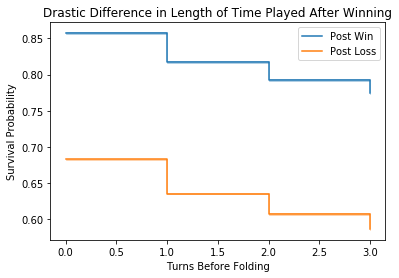

In [24]:
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
%matplotlib inline


kmf = KaplanMeierFitter()

kmf.fit(survival.query('prior_win == True')['duration'], survival.query('prior_win == True')['event'], label='Post Win')
a1 = kmf.plot(ci_show=True)
kmf.fit(survival.query('prior_win == False')['duration'], survival.query('prior_win == False')['event'], label='Post Loss')
kmf.plot(ax=a1, ci_show=True)

plt.xlabel('Turns Before Folding')
plt.ylabel('Survival Probability')
plt.title('Drastic Difference in Length of Time Played After Winning')

In [94]:
survival = pd.read_csv('survival.csv')
survival = survival.drop(survival.columns[0], axis=1)
survival.head()

,position,stack_size,prior_win,duration,event
0,1,1680,False,3,0
1,8,1660,False,0,1
2,7,1660,False,0,1
3,7,1660,False,3,0
4,5,1785,True,0,1


In [95]:
len(survival)

1346474

In [96]:
surv_form = pd.DataFrame(columns = ['position', 'stack_size', 'prior_win', 'time_step', 'event'])

counter = 0
for row in survival.values:
    counter = counter + 1
    if counter % 10000 == 0:
        print(counter)
    if counter % 100000 == 0:
        break
    for i in range(row[3] + 1):
        eve = row[4] if i == row[3] else 0
        surv_form.loc[len(surv_form)] = [row[0], row[1], row[2], i, eve]

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000


In [177]:
surv_form_dummied = pd.get_dummies(surv_form, columns = ['time_step'])
surv_form_dummied['Intercept'] = 1
surv_form_dummied = surv_form_dummied.astype(int)
surv_form_dummied = surv_form_dummied.drop('time_step_0', axis=1) #baseline
surv_form_dummied.head()

,position,stack_size,prior_win,event,time_step_1,time_step_2,time_step_3,Intercept
0,1,1680,0,0,0,0,0,1
1,1,1680,0,0,1,0,0,1
2,1,1680,0,0,0,1,0,1
3,1,1680,0,0,0,0,1,1
4,8,1660,0,1,0,0,0,1


In [193]:
# With prior win
logit = sm.Logit(surv_form_dummied['event'].values, 
                 surv_form_dummied.loc[:, surv_form_dummied.columns != 'event'].values).fit()
full_llf = logit.llf
logit.summary()

Optimization terminated successfully.
         Current function value: 0.299840
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               281168
Model:                          Logit   Df Residuals:                   281161
Method:                           MLE   Df Model:                            6
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.3158
Time:                        21:03:02   Log-Likelihood:                -84305.
converged:                       True   LL-Null:                   -1.2321e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4194      0.003    158.643      0.000       0.414       0.425
x2         -1.401e-06   9.49e-08    -14.755      0.000   -1.59e-06   -1.21e-06
x3            -0.4672      0.017    -26.830      0.000      -0.501      -0.433
x4            -2.0013      0.019   -107.710      0.000      -2.038      -1.965
x5            -2.5248      0.023   -108.772      0.000      -2.570      -2.479
x6            -2.5910      0.025   -105.332      0.000      -2.639      -2.543
const         -2.0229      0.014   -149.117      0.000      -2.050      -1.996
==============================================================================
"""

In [191]:
logit.conf_int()

array([[ 4.14197743e-01,  4.24560233e-01],
       [-1.58674185e-06, -1.21462963e-06],
       [-5.01339632e-01, -4.33079845e-01],
       [-2.03774146e+00, -1.96490663e+00],
       [-2.57028904e+00, -2.47930014e+00],
       [-2.63918032e+00, -2.54275728e+00],
       [-2.04950880e+00, -1.99633097e+00]])

In [200]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = ['Position', 'Stack Size', 'Prior Win', 'D1', 'D2', 'D3']
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(surv_form_dummied[['position', 'stack_size', 'prior_win', 'time_step_1', 'time_step_2', 'time_step_3']].values, i)
                          for i in range(6)]
print(vif_data)

      feature       VIF
0    Position  1.570419
1  Stack Size  1.354866
2   Prior Win  1.253319
3          D1  1.272091
4          D2  1.242614
5          D3  1.226034


In [188]:
# Without prior win
logit = sm.Logit(surv_form_dummied['event'].values, 
                 surv_form_dummied[[x for x in surv_form_dummied.columns if x not in ['event', 'prior_win']]].values).fit()
partial_llf = logit.llf
logit.summary()

Optimization terminated successfully.
         Current function value: 0.301188
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               281168
Model:                          Logit   Df Residuals:                   281162
Method:                           MLE   Df Model:                            5
Date:                Sat, 10 Apr 2021   Pseudo R-squ.:                  0.3127
Time:                        20:44:00   Log-Likelihood:                -84685.
converged:                       True   LL-Null:                   -1.2321e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4299      0.003    164.116      0.000       0.425       0.435
x2         -1.569e-06   9.47e-08    -16.561      0.000   -1.75e-06   -1.38e-06
x3            -2.0126      0.019   -108.290      0.000      -2.049      -1.976
x4            -2.5353      0.023   -109.172      0.000      -2.581      -2.490
x5            -2.6006      0.025   -105.681      0.000      -2.649      -2.552
const         -2.1355      0.013   -164.212      0.000      -2.161      -2.110
==============================================================================
"""

In [186]:
LR = likelihood_ratio(partial_llf,full_llf)
chi2.sf(LR, 1) # L2 has 1 DoF more than L1

6.103971951328209e-167

In [189]:
logit.conf_int()

array([[ 4.24744884e-01,  4.35012576e-01],
       [-1.75467817e-06, -1.38330981e-06],
       [-2.04900314e+00, -1.97615100e+00],
       [-2.58077587e+00, -2.48974459e+00],
       [-2.64884877e+00, -2.55238625e+00],
       [-2.16098714e+00, -2.11001039e+00]])

In [97]:
surv_form_dummied = pd.get_dummies(surv_form, columns = ['time_step'])
surv_form_dummied = surv_form_dummied.astype(int)
surv_form_dummied = surv_form_dummied.drop('time_step_0', axis=1) #baseline
surv_form_dummied.head()

,position,stack_size,prior_win,event,time_step_1,time_step_2,time_step_3
0,1,1680,0,0,0,0,0
1,1,1680,0,0,1,0,0
2,1,1680,0,0,0,1,0
3,1,1680,0,0,0,0,1
4,8,1660,0,1,0,0,0


In [99]:
surv_form_dummied.to_csv('surv_form_dummied.csv')

In [93]:
surv_form

,Unnamed: 0,position,stack_size,prior_win,duration,event
0,0,1,1680,False,3,0
1,1,8,1660,False,0,1
2,2,7,1660,False,0,1
3,3,7,1660,False,3,0
4,4,5,1785,True,0,1
...,...,...,...,...,...,...
1346469,1346469,2,2100,False,3,0
1346470,1346470,1,1220,False,3,0
1346471,1346471,3,1380,True,3,0
1346472,1346472,2,1400,True,3,0
